# Automated Feature Selection with the Boruta Algorithm

Group 5: Aleksei Berdiuzhenko, Amanda Ledell & Anette Fagerheim Bjerke



# What is the Boruta Algorithm?
- **Wrapper method** built around random forest classification.
- Designed to **find all relevant features** in a dataset.
- Compares the importance of original features with **randomly shuffled copies (shadow features)**.



# How Does Boruta Work?

<table style="background-color: white; width: 100%;">
<tr>
<td style="vertical-align: top; width: 60%; background-color: white;">
  <ol>
    <li><strong>Augment</strong> the dataset with shadow features.
      <ul>
        <li>Create shadow features: Randomly shuffle each feature</li>
        <li>Concatenate the shadow features to the original features.</li>
      </ul>
    </li>
    <li><strong>Train</strong> a random forest classifier.</li>
    <li><strong>Calculate feature importance</strong> scores.
      <ul>
        <li>Using Z-scores.</li>
      </ul>
    </li>
    <li><strong>Compare</strong> importance of real features to their shadow counterparts.
      <ul>
        <li>Feature Z-score &gt; Max Shadow Feature Z-score</li>
      </ul>
    </li>
    <li><strong>Iteratively remove</strong> features deemed less important than shadows.</li>
  </ol>
</td>
<td style="text-align: center; width: 50%; background-color: white;">
  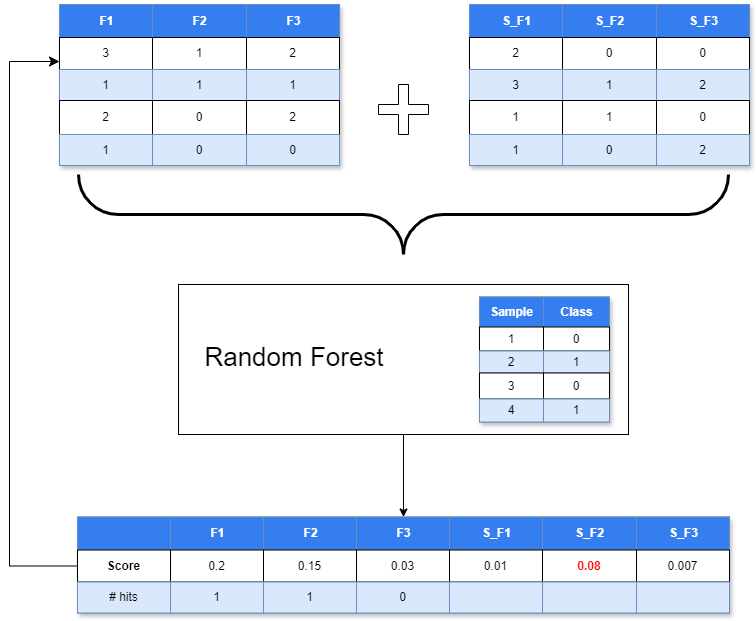
  <p>Figure based on figure from DataCamp.</p>
</td>
</tr>
</table>


# Implementing Boruta in Python

We will use the `BorutaPy` library.


In [ ]:
# Install BorutaPy if not already installed
!pip install boruta

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Split data into training and test sets
from sklearn.model_selection import train_test_split
from boruta import BorutaPy
from sklearn import metrics

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

## Data Exploration


In [16]:
# Load dataset from sklearn
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names) 
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Preprocess and set up

In [18]:
# Convert to DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Feature names for reference
feature_names = np.array(X.columns)

# Normalize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Random Forest model (you can tune parameters as needed)
model_boruta_rf = RandomForestClassifier(max_depth=10, random_state=42)# For Boruta selection
model_boruta_xgb = xgb.XGBClassifier(max_depth=10) # For Boruta selection

## Running Boruta


In [23]:
# Define Boruta feature selection method
#feat_selector = BorutaPy(model_boruta_rf, n_es timators='auto', verbose=0, random_state=42)
feat_selector = BorutaPy(model_boruta_xgb, n_estimators='auto', verbose=2, random_state=42)

# Find all relevant features
feat_selector.fit(X_train, y_train)

# Create a pandas DataFrame to store feature names, ranks, and whether they were kept
feature_ranks_df = pd.DataFrame({
    'Feature': feature_names, 'Ranking': feat_selector.ranking_, 'Keep': feat_selector.support_})

# Sort features by making 1 the best rank
feature_ranks_df_sort = feature_ranks_df.sort_values(by='Ranking')
feature_ranks_df_sort['Inverse_Ranking'] = 1 / feature_ranks_df_sort['Ranking']

kept_features = feature_ranks_df[feature_ranks_df['Keep'] == True]
print(f'Number of kept features: {kept_features.shape[0]} \n {feature_ranks_df}' )

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	9
Rejected: 	17
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	9
Rejected: 	17
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	9
Rejected: 	17
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	9
Rejected: 	17
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	9
Rejected: 	17
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	9
Rejected: 	17
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	9
Rejected: 	17
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	9
Rejected: 	17
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	9
Rejected: 	17
I

## Visualizing Feature Rankings


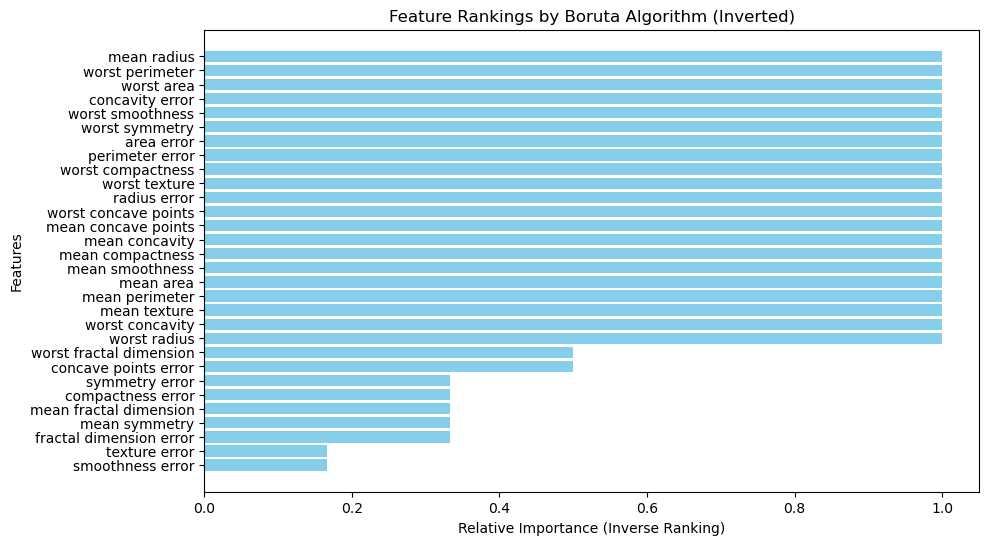

In [19]:
plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df_sort['Feature'], feature_ranks_df_sort['Inverse_Ranking'], color='skyblue')
plt.xlabel('Relative Importance (Inverse Ranking)'), plt.ylabel('Features')
plt.title('Feature Rankings by Boruta Algorithm (Inverted)'), plt.gca().invert_yaxis()
plt.show()

In [24]:
# Now use the subset of features to fit XGBoost model on training data
X_train_filtered = feat_selector.transform(X_train)

xgb_model_filtered = xgb.XGBClassifier()
xgb_model_all = xgb.XGBClassifier()

# Fit model
xgb_model_filtered.fit(X_train_filtered, y_train)
xgb_model_all.fit(X_train, y_train)

# Apply feature selector transform to the test data
X_test_filtered = feat_selector.transform(X_test)

# Make predictions on test data
prediction_boruta = xgb_model_filtered.predict(X_test_filtered)
prediction_all = xgb_model_all.predict(X_test)

# Print overall accuracy
print(f'the model with = {xgb_model_filtered.n_features_in_} has an accuracy = {metrics.accuracy_score(y_test, prediction_boruta)}')
print(f'The model with = {xgb_model_all.n_features_in_} has an accuracy = {metrics.accuracy_score(y_test, prediction_all)}')

the model with = 9 has an accuracy = 0.951048951048951
The model with = 30 has an accuracy = 0.958041958041958


# Advantages and disadvantages with Boruta
| 👍                                                                 |     👎                                                             |
|--------------------------------------------------------------------------|--------------------------------------------------------------------------|
| - **All-relevant** feature selection.                                     | - **Computationally intensive** on large datasets.                       |
| - **Robust** against overfitting.                                         | - **Longer runtime** due to iterative process.                           |
| - Automatically handles **feature interactions**.                        | - Relies on the **random forest** algorithm.                             |
| - **No need** to set a manual threshold for feature importance.           | - May **retain redundant features** that are equally relevant.           |
|                                                                          | - Cannot handle missing data.                                            |


# Boruta vs. other feature selection approaches

| Algorithm | Pros | Cons |
|-----------|------|------|
| **Boruta** | - Identifies all relevant features, including interactions (1).<br> - Robust against overfitting (1).<br> - Easy to implement with Random Forest (1). | - Computationally intensive for large datasets (1).<br> - May select irrelevant features in noisy datasets (2).<br> - Dependent on Random Forest performance (3). |
| **Shapley Values** | - Provides consistent and locally accurate feature importance (4).<br> - Model-agnostic, applicable to any model (5).<br> - Handles feature interactions well (6). | - Computationally expensive, especially for large datasets (4).<br> - Difficult to interpret in the presence of correlated features (6).<br> - Requires significant computational resources (5). |
| **Recursive Feature Elimination (RFE)** | - Considers feature interactions (7).<br> - Can be used with any supervised learning algorithm (7). <br> - Effective for high-dimensional datasets (7). | - Computationally demanding (7).<br> - May not detect redundant features (7).<br> - Performance depends on the choice of the underlying model (7). |

<div style="font-size: 60%;">
1: <a href="https://www.datacamp.com/tutorial/feature-selection-R-boruta">https://www.datacamp.com/tutorial/feature-selection-R-boruta</a><br>
2: <a href="https://danielhomola.com/feature%20selection/phd/borutapy-an-all-relevant-feature-selection-method/">https://danielhomola.com/feature%20selection/phd/borutapy-an-all-relevant-feature-selection-method/</a><br>
3: <a href="https://pypi.org/project/Boruta/">https://pypi.org/project/Boruta/</a><br>
4: <a href="https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html">https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html</a><br>
5: <a href="https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability">https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability</a><br>
6: <a href="https://deepchecks.com/a-comprehensive-guide-into-shap-shapley-additive-explanations-values/">https://deepchecks.com/a-comprehensive-guide-into-shap-shapley-additive-explanations-values/</a><br>
7: <a href="https://machinelearningmastery.com/rfe-feature-selection-in-python/">https://machinelearningmastery.com/rfe-feature-selection-in-python/</a>
</div>


# Food for though: Boruta algorithm can potentially be enhanced with Genetic Algorithms


(https://kalaharijournals.com/resources/JUNE-77.pdf)
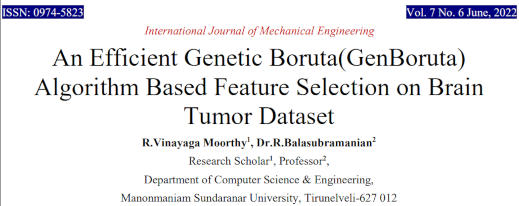

# (More) Food for though: Other feature selection approaches *also* can be enahanced with Genetic Algorithms
https://www.mdpi.com/2076-3417/14/14/6081 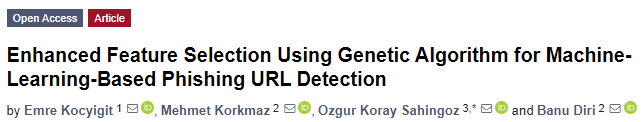 \
https://www.mdpi.com/2073-8994/13/11/2021 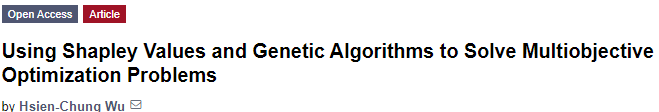

<style>
    .rendered_html table {
        margin-left: auto;
        margin-right: auto;
        width: 90%; /* Adjusts the table width to take up more space */
    }
    .rendered_html th, .rendered_html td {
        padding: 10px; /* Adds padding to cells for better readability */
    }
</style>

# Conclusions

---

| **Aspect**             | **Details** |
|------------------------|-----------------|
| **Purpose**            | **Identify all relevant features** by comparing them to randomly generated "shadow features". |
| **How it Works**       | Uses **feature importance** to compare real features with the shadows **automatically**|
| **When to Use**        | **Complex datasets**, suspected **non-linear relationships** or **all important featues should be considered**
| **When NOT to Use**    | **Large datasets**, **simple models** with few features, if there is a need for only the  **most relevant** features|
| **Advantages**         | **Comprehensive** - nothing gets missed, Works with **complex, non-linear models** and it is **automatic**
| **Disadvantages**      | **Computationally expensive** and may retain **too many features** |



# References

- Kursa, M. B., & Rudnicki, W. R. (2010). Feature Selection with the Boruta Package. *Journal of Statistical Software*.
- [BorutaPy Documentation](https://github.com/scikit-learn-contrib/boruta_py)
-  Ali, M. 14.05.2022 Boruta Feature Selection Explained in Python *Medium*, URLdate: 23.09.24 [URL](https://medium.com/geekculture/boruta-feature-selection-explained-in-python-7ae8bf4aa1e7)
- DataCamp Team, 07.03.2018. Feature Selection in R with the Boruta R Package URLdate: 23.09.24 [URL](https://www.datacamp.com/tutorial/feature-selection-R-boruta)
- PREM KUMAR BORUGADDA 23.11.2021 Lecture-48: Boruta Feature Selection Algorithm with python  URLdate: 23.09.24 [URL](https://www.youtube.com/watch?v=R7G21L6gZ4Q)